Here we build a model to find the applicant will be approved loan status or not.This is a classification problem where we have to predict whether a loan will be approved or not. Specifically,
it is a binary classification problem where we have to predict either one of the two classes given i.e.
approved (Y) or not approved (N). 
The dependent variable or target variable is the Loan_Status, while the rest are independent variable or features.
We need to develop a model using the features to predict the target variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")


# Here we load a data into data frame

In [2]:
df=pd.read_csv("Loan application_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Application Income,CoapplicantIncome,Loan_Amount,Loan_amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Application Income,CoapplicantIncome,Loan_Amount,Loan_amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     Application Income  CoapplicantIncome  Loan_Amount  Loan_amount_Term  \
0                  5849   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Application Income  614 non-null    int64  
 7   CoapplicantIncome   614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Application Income', 'CoapplicantIncome',
       'Loan_Amount', 'Loan_amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [8]:
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Application Income     0
CoapplicantIncome      0
Loan_Amount           22
Loan_amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

#There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

In [9]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Application Income,CoapplicantIncome,Loan_Amount,Loan_amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


# Exploratory Data Analysis

In [10]:
df.shape

(614, 13)

# Here we find uniques values in data sets

In [11]:
df.nunique().to_frame("Unique values")

,Unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Application Income,505
CoapplicantIncome,287
Loan_Amount,203
Loan_amount_Term,10


In [12]:
dfcor=df.corr()
dfcor

,Application Income,CoapplicantIncome,Loan_Amount,Loan_amount_Term,Credit_History
Application Income,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
Loan_Amount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


#Here we find corelation between features
#There is a high corelation between Application income and Loan_Amount

In [13]:
np.mean(df["Loan_Amount"])

146.41216216216216

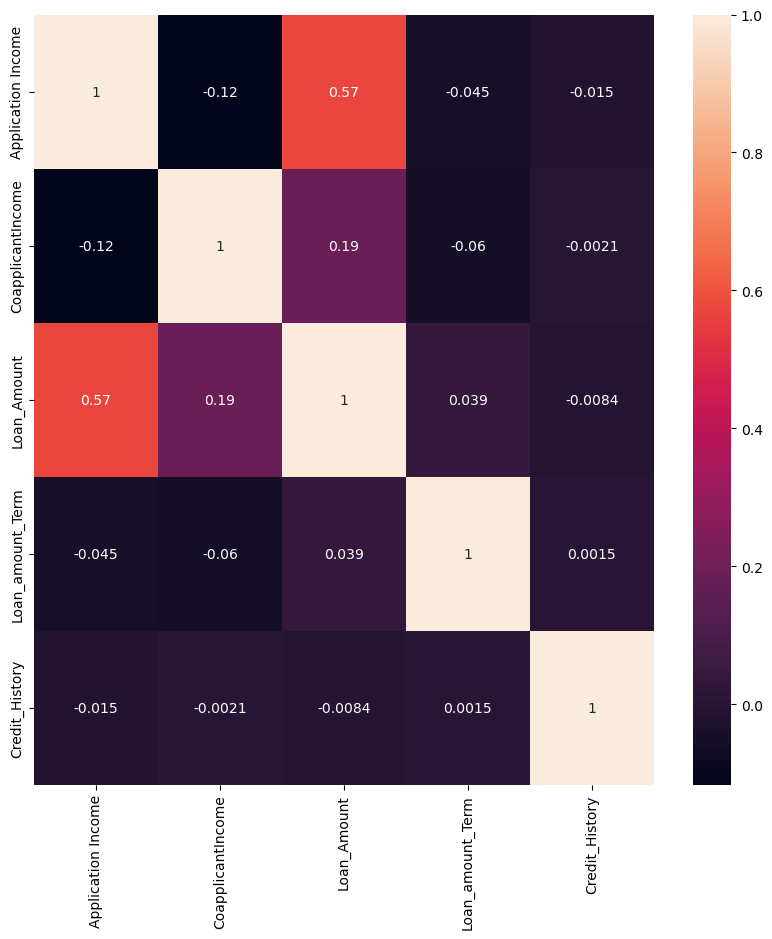

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# From above corelation data we find that there is high corelation between Application Income and Laon Amount

<Axes: >

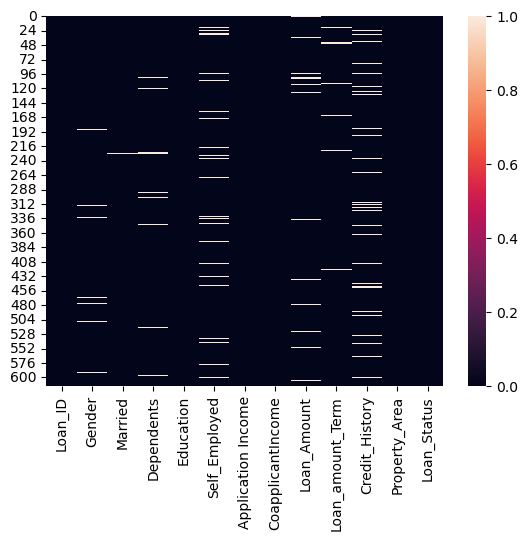

In [15]:
sns.heatmap(df.isnull())

In [16]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#Here we find that 422 out of total 614 loan get approved

In [17]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [18]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [19]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

from above data we find that
    79.64 % applicants in the dataset are male.
    Around 64.8% of the applicants in the dataset are married.
    Around 77.4% applicants have credit history .
    Around 78.17% of the applicants are Graduate.


In [21]:
df.skew()

Application Income    6.539513
CoapplicantIncome     7.491531
Loan_Amount           2.677552
Loan_amount_Term     -2.362414
Credit_History       -1.882361
dtype: float64

# at some places skewness' is present

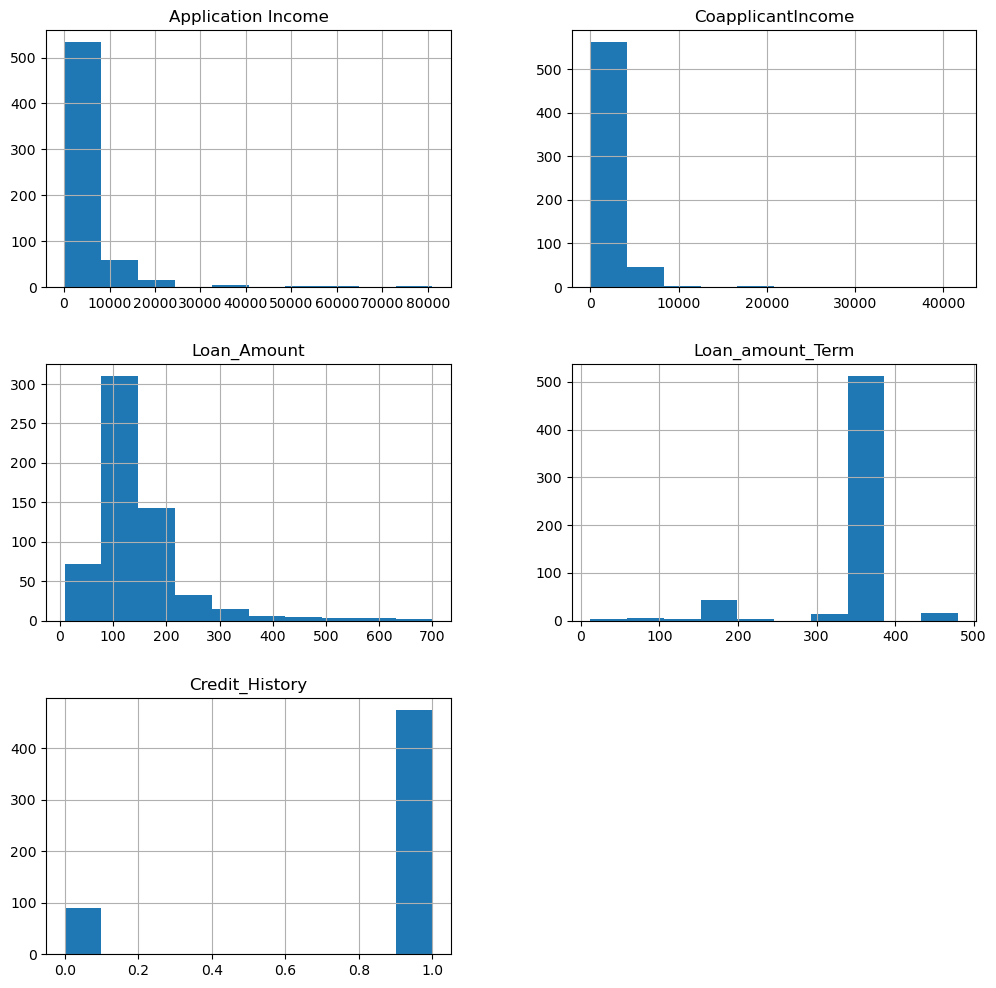

In [22]:
df.hist(figsize=(12,12))
plt.show()

In [23]:
print("The shape of the data set:",df.shape)

The shape of the data set: (614, 13)


In [24]:
df=df.drop_duplicates()
print("Rows and columns after droping duplicate:",df.shape)

Rows and columns after droping duplicate: (614, 13)


In [25]:
categorical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="O":
        categorical_cols.append(x)
print(f"object data type columns are:\n",categorical_cols)

numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber Data Types Columns are:\n",numerical_cols)

object data type columns are:
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Number Data Types Columns are:
 ['Application Income', 'CoapplicantIncome', 'Loan_Amount', 'Loan_amount_Term', 'Credit_History']


# Here we find Bar Plot to visualize the frequency

Y    422
N    192
Name: Loan_Status, dtype: int64


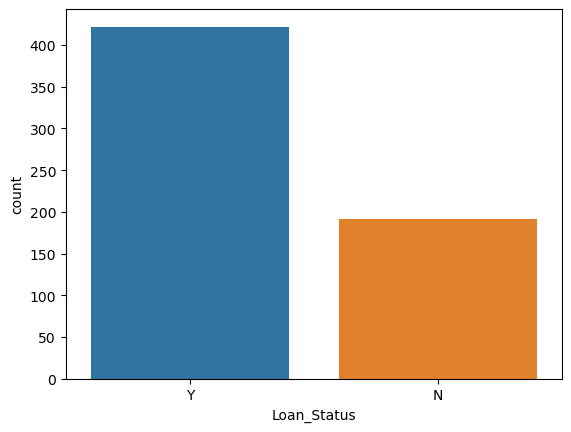

In [26]:
ax=sns.countplot(x="Loan_Status",data=df[categorical_cols])
print(df["Loan_Status"].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


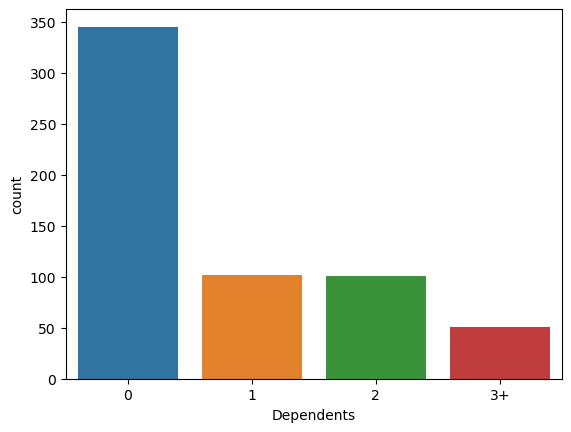

In [27]:
ax=sns.countplot(x="Dependents",data=df[categorical_cols])
print(df["Dependents"].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64


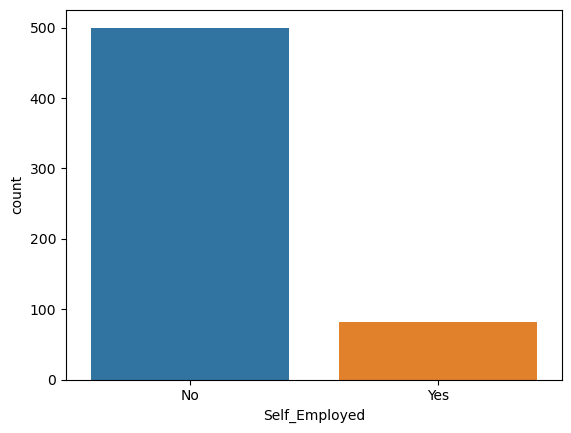

In [28]:
ax=sns.countplot(x="Self_Employed",data=df[categorical_cols])
print(df["Self_Employed"].value_counts())

-1.8823610612186696


<Axes: xlabel='Credit_History', ylabel='Density'>

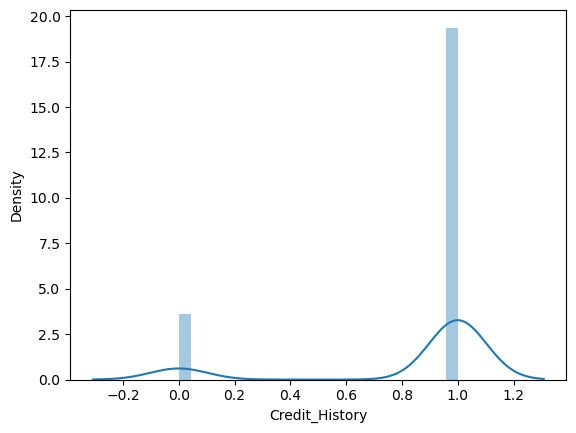

In [29]:
print(df["Credit_History"].skew())
sns.distplot(df["Credit_History"],kde=True)

-2.362414124216269


<Axes: xlabel='Loan_amount_Term', ylabel='Density'>

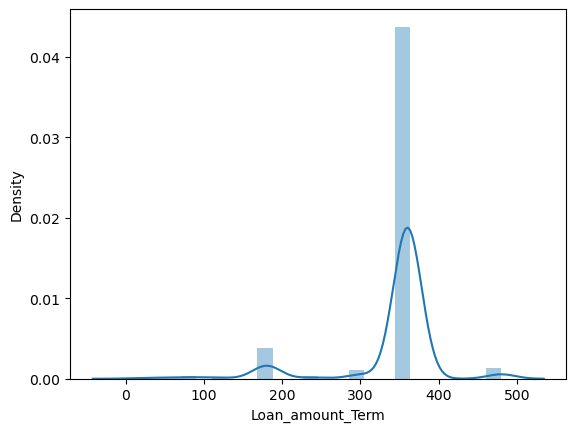

In [30]:
print(df["Loan_amount_Term"].skew())
sns.distplot(df["Loan_amount_Term"],kde=True)

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: Loan_Amount, Length: 614, dtype: float64>


<Axes: xlabel='Loan_Amount', ylabel='Density'>

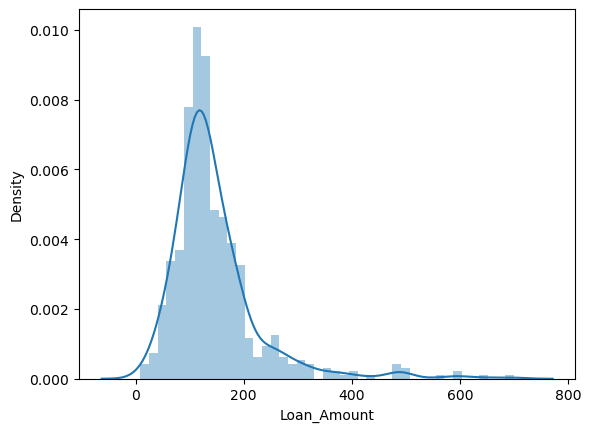

In [31]:
print(df["Loan_Amount"].skew)
sns.distplot(df["Loan_Amount"],kde=True)

from above pattern It can be seen that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The distribution is right-skewed (positive skewness). We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

<Axes: xlabel='Self_Employed', ylabel='Education'>

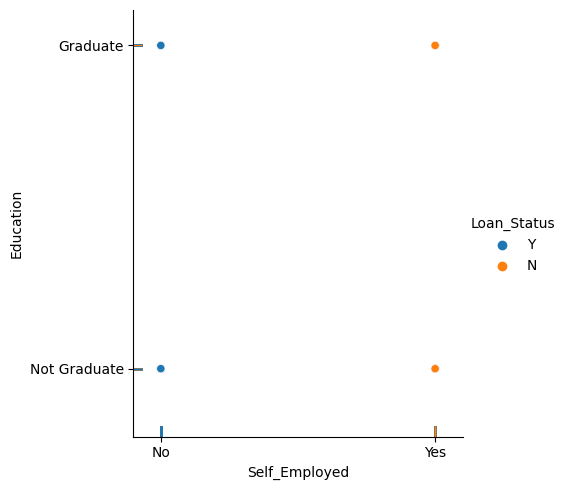

In [32]:
sns.relplot(data=df,x="Self_Employed",y="Education",hue="Loan_Status")
sns.rugplot(data=df,x="Self_Employed",y="Education",hue="Loan_Status",legend=False)

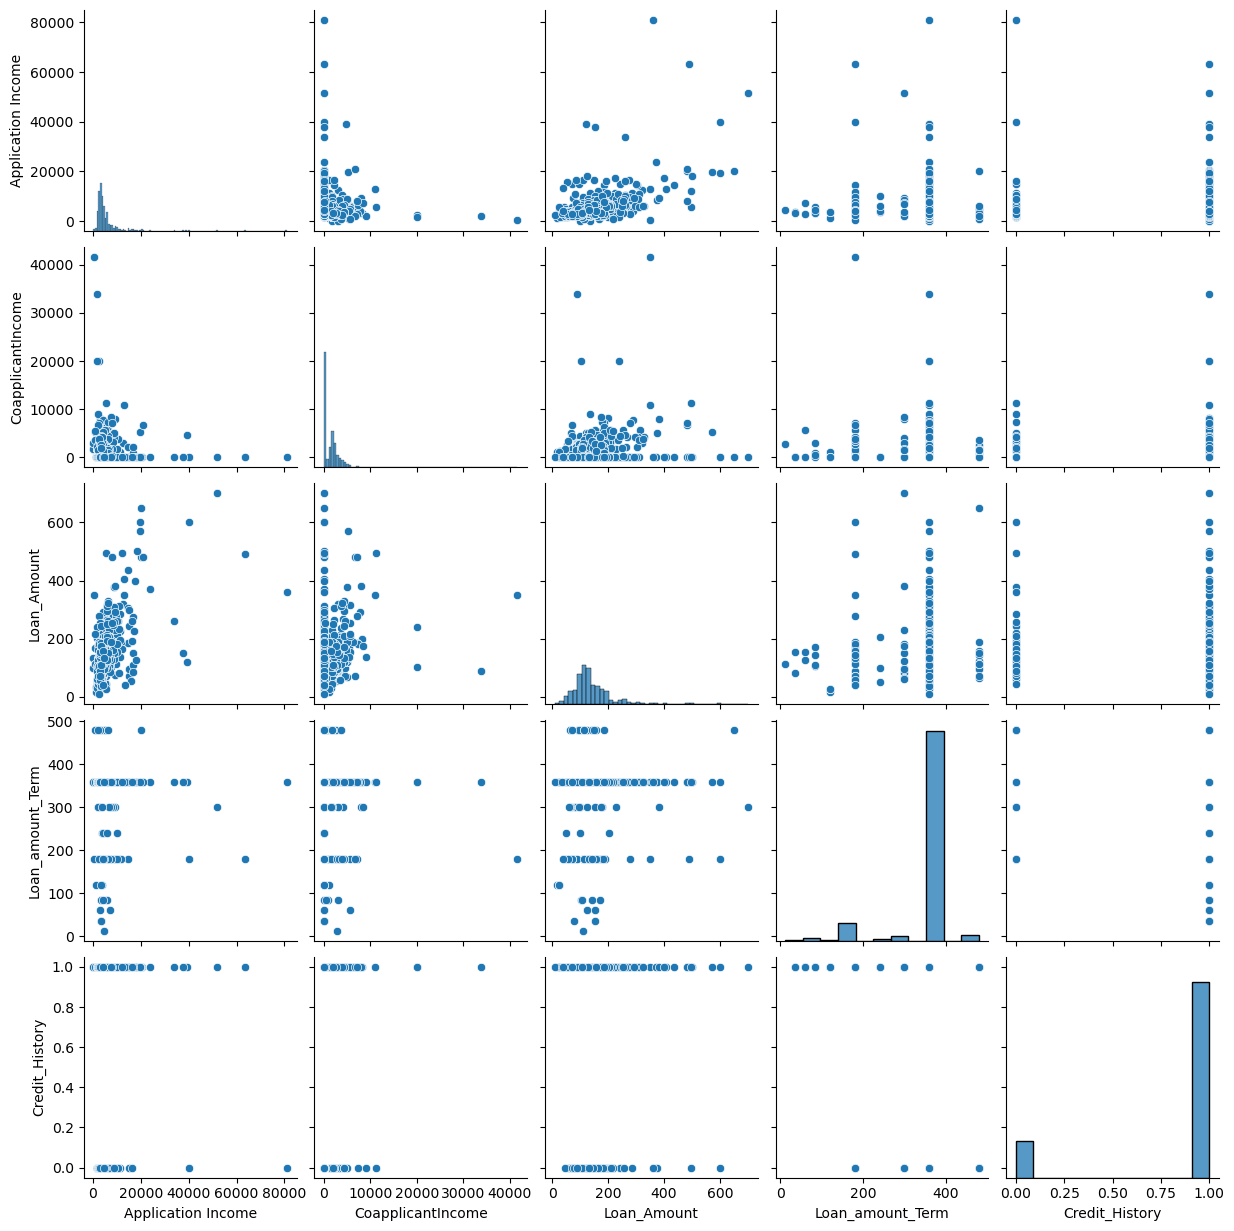

In [33]:
sns.pairplot(df)

Missing value 
After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [34]:
df=df.replace(" ",np.nan)

In [35]:
df=df.fillna(0)

# check whether all the missing values are filled

In [36]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Application Income    0
CoapplicantIncome     0
Loan_Amount           0
Loan_amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

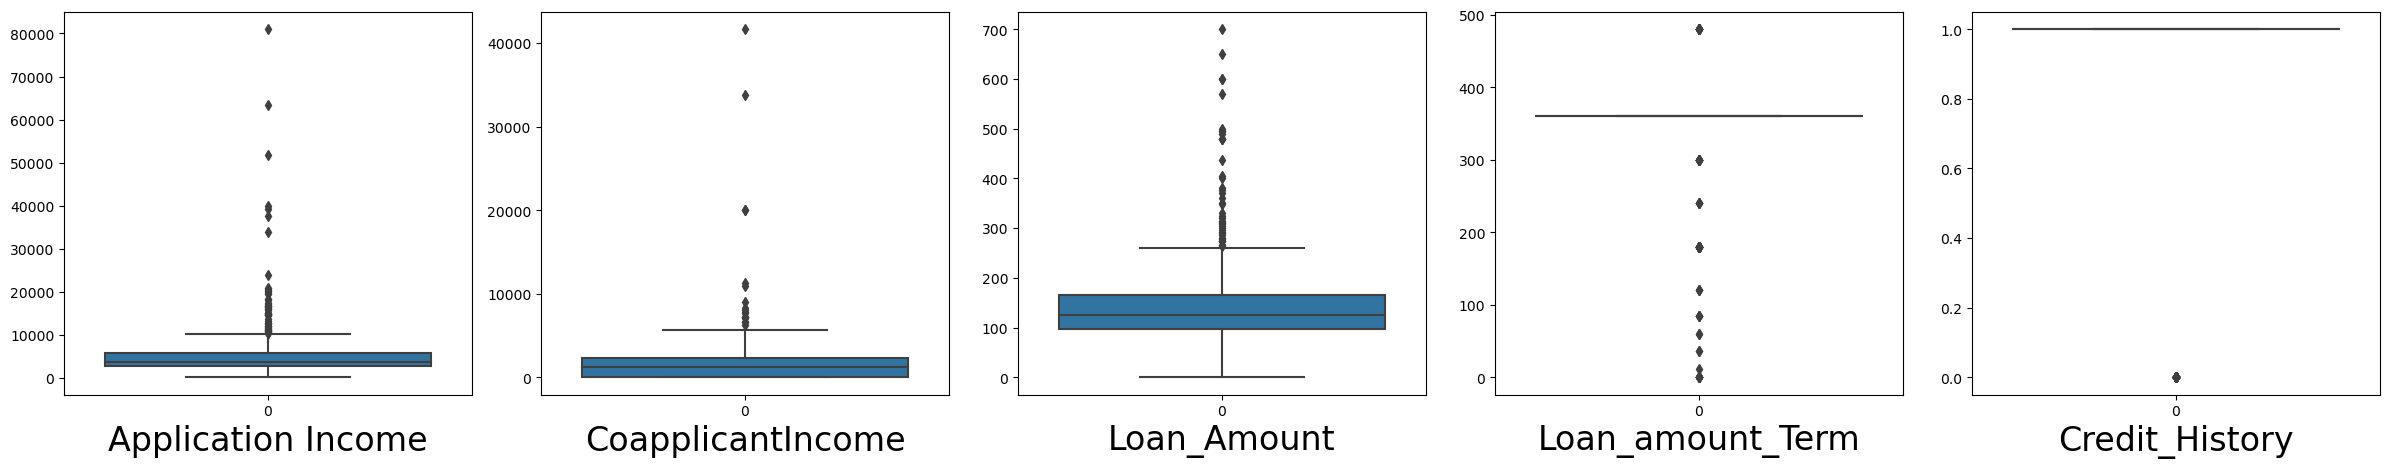

In [37]:
plt.figure(figsize=(24,18),facecolor="white")
plot_number=1
for column in df[numerical_cols]:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=24)
    plot_number +=1
plt.tight_layout()

from above boxplot we can see that there are many outliers present in Application income,CoapplicationIncome,Loan_Amount,Loan_amount_Term
majority applicant income is approx 5000 and CoapplicantIncome is 2500 and loan amount in between(100 to 190) 

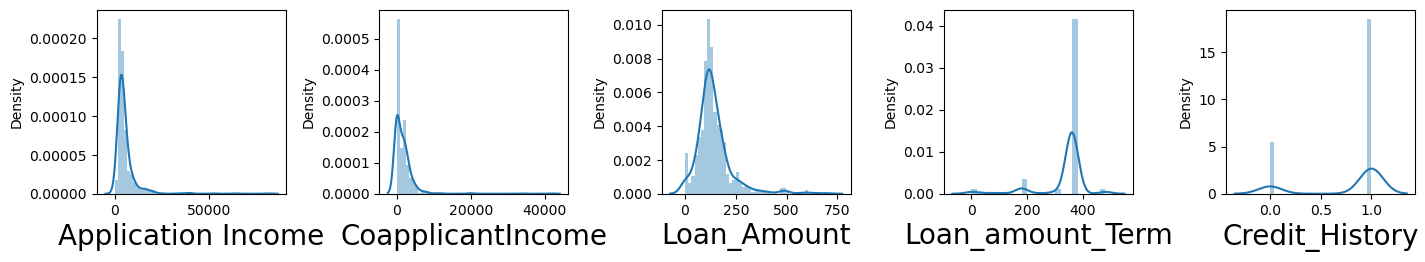

In [38]:
plt.figure(figsize=(20,15),facecolor="white")
plot_number=1
for column in df[numerical_cols]:
    if plot_number<=20:
        ax=plt.subplot(6,7,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_number +=1
plt.tight_layout()

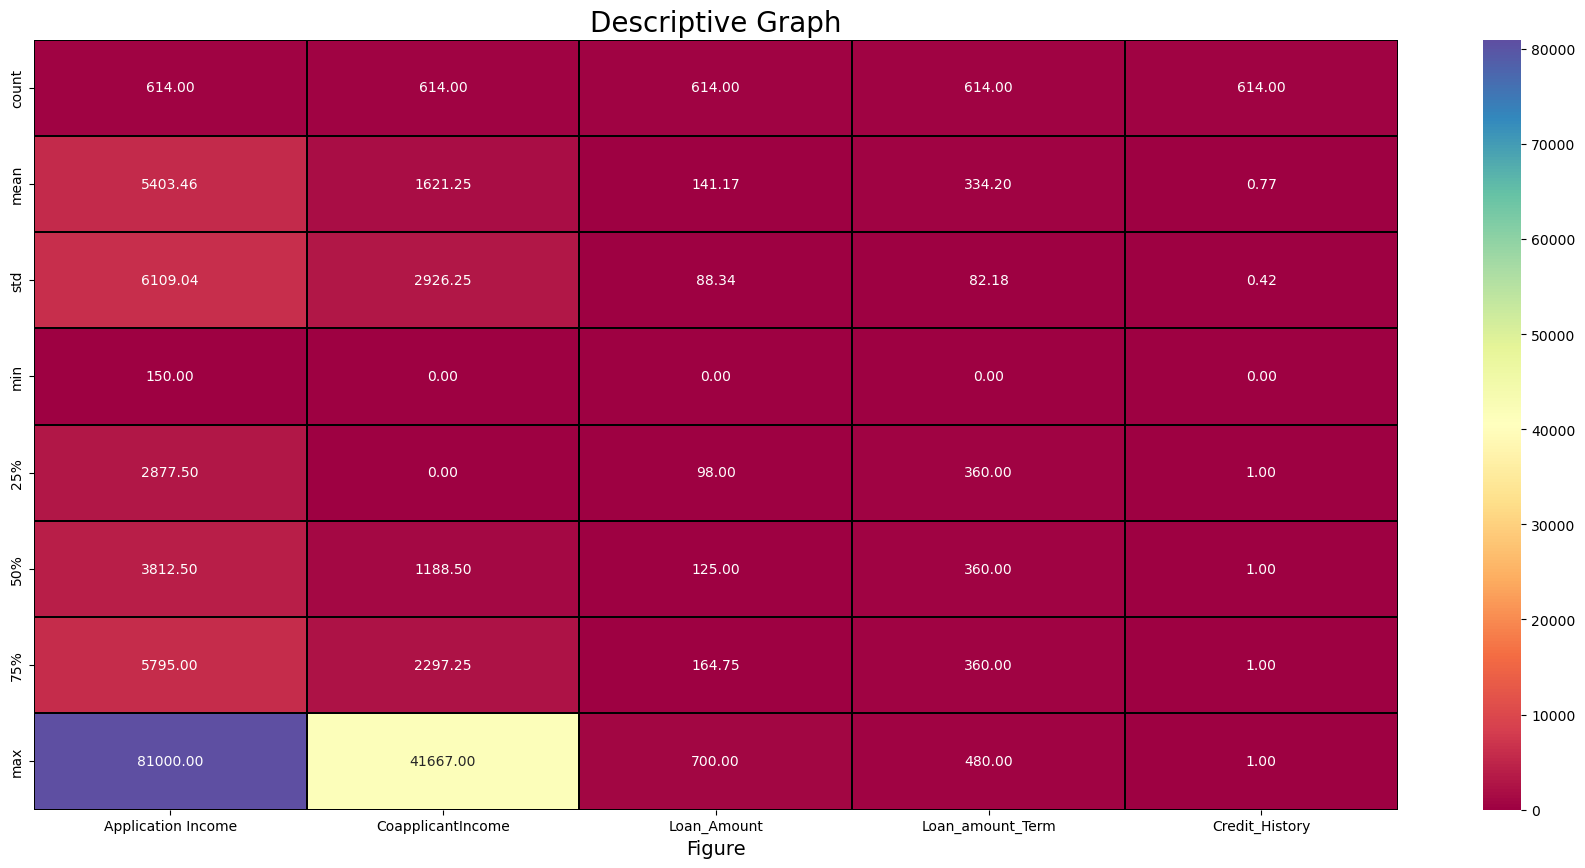

In [39]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

In above plot , altogether, program creates a heatmap visualization of the descriptive statistics of the DataFrame df, annotates each cell with its numeric value, sets the x-axis label to "Figure", and sets the title of the plot to "Descriptive Graph". Finally, it displays the plot.

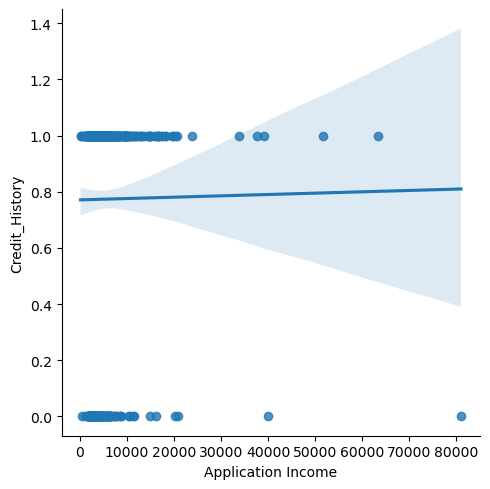

In [40]:
import seaborn as sns
sns.lmplot(x="Application Income",y="Credit_History",data=df,palette="colorblind")

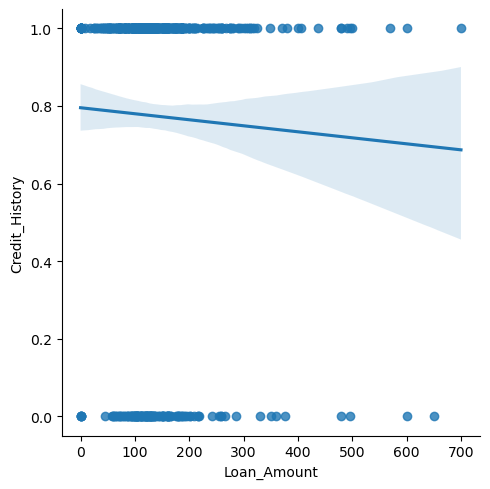

In [41]:
sns.lmplot(x="Loan_Amount",y="Credit_History",data=df,palette="colorblind")

In [42]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

We use Label Encoding for process of converting categorical data into numerical format. This is necessary because in our data categorical value is present,so we require input features to be numeric. Label Encoding assigns a unique integer to each category in the loan application dataset.

In [43]:
for i in df[categorical_cols]:
    df[i] = df[i].astype(str)  # Convert all values to strings
    df[i] = le.fit_transform(df[i])  # Encode the column

In [44]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Application Income,CoapplicantIncome,Loan_Amount,Loan_amount_Term,Credit_History,Property_Area,Loan_Status
0,0,2,1,0,0,1,5849,0.0,0.0,360.0,1.0,2,1
1,1,2,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,2,2,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,3,2,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,4,2,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,0,1
610,610,2,2,3,0,1,4106,0.0,40.0,180.0,1.0,0,1
611,611,2,2,1,0,1,8072,240.0,253.0,360.0,1.0,2,1
612,612,2,2,2,0,1,7583,0.0,187.0,360.0,1.0,2,1


In [56]:
df.drop("Loan_ID",axis=1)

,Gender,Married,Dependents,Education,Self_Employed,Application Income,CoapplicantIncome,Loan_Amount,Loan_amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,0,1,5849,0.0,0.0,360.0,1.0,2,1
1,2,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,2,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,2,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,2,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,0,1
610,2,2,3,0,1,4106,0.0,40.0,180.0,1.0,0,1
611,2,2,1,0,1,8072,240.0,253.0,360.0,1.0,2,1
612,2,2,2,0,1,7583,0.0,187.0,360.0,1.0,2,1


# here we drop column Laon id

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

#Model Building

#Now drop the Loan_Status variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [58]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [59]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [60]:
x,y=sm.fit_resample(x,y)
y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.77231934,  0.55351452, -1.14025828, ...,  0.32067156,
         0.69666787,  1.34118789],
       [-1.76650225,  0.55351452,  0.85224273, ...,  0.32067156,
         0.69666787, -1.25208263],
       [-1.76068515,  0.55351452,  0.85224273, ...,  0.32067156,
         0.69666787,  1.34118789],
       ...,
       [ 1.74120752, -1.434427  , -1.14025828, ...,  0.32067156,
        -1.49961793,  0.04455263],
       [-0.58563146,  0.55351452,  0.85224273, ...,  0.32067156,
        -1.58068895,  0.04455263],
       [-0.7252418 ,  0.55351452, -1.14025828, ...,  0.32067156,
        -0.76561115, -1.25208263]])

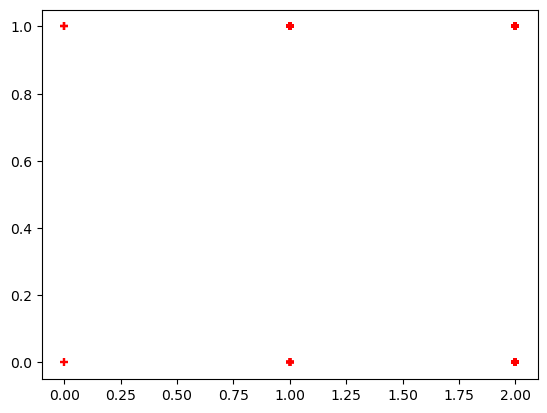

In [62]:
%matplotlib inline
plt.scatter (df.Gender,df.Loan_Status,marker="+",color="red")

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [112]:
print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of x_train :",y_train.shape)
print("Size of x_train :",y_test.shape)

Size of x_train : (759, 12)
Size of x_test : (85, 12)
Size of x_train : (759,)
Size of x_train : (85,)


In [113]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [114]:
model.predict(x_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [115]:
model.score(x_test,y_test)

0.7294117647058823

In [116]:
model.predict_proba(x_test)

array([[0.29513618, 0.70486382],
       [0.17125149, 0.82874851],
       [0.53314342, 0.46685658],
       [0.58086627, 0.41913373],
       [0.24293495, 0.75706505],
       [0.15446848, 0.84553152],
       [0.32234868, 0.67765132],
       [0.29293843, 0.70706157],
       [0.54829434, 0.45170566],
       [0.25979685, 0.74020315],
       [0.86311068, 0.13688932],
       [0.49371076, 0.50628924],
       [0.20180486, 0.79819514],
       [0.25855415, 0.74144585],
       [0.16144774, 0.83855226],
       [0.93288707, 0.06711293],
       [0.86678174, 0.13321826],
       [0.63560542, 0.36439458],
       [0.25909311, 0.74090689],
       [0.70504302, 0.29495698],
       [0.77073616, 0.22926384],
       [0.52483099, 0.47516901],
       [0.20992895, 0.79007105],
       [0.13942164, 0.86057836],
       [0.61581879, 0.38418121],
       [0.26017574, 0.73982426],
       [0.47940695, 0.52059305],
       [0.35049114, 0.64950886],
       [0.87449259, 0.12550741],
       [0.54099166, 0.45900834],
       [0.

#Education - Applicants with higher education level should have higher chances of loan approval
#Income- Applicants with higher income should have more chances of loan approval
#Loan amount- If the loan amount is less, then the chances of loan approval should be high
#Loan term- Loans with shorter time period should have higher chances of approval
#Previous credit history- Applicants who have repayed their previous debts should have higher chances of loan approval
#Monthly installment amount- If the monthly installment amount is low, the chances of loan approval should be high

In [117]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(420):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print("Best score:",maxAcc)
print("Random State:",rs)

Best score: 0.8588235294117647
Random State: 135


In [98]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=420)
    
    #training the model
    clf.fit(x_train,y_train)
    
    #predicting Y_Test
    pred=clf.predict(x_test)
    
    #Accuracy Score
    acc_score =(accuracy_score(y_test,pred))
    print ("Accuracy Score:",acc_score)
    
    #confusion matrix:
    print("confusion matrix:\n",confusion_matrix(y_test,pred))
    
    #classification report
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    #cross validation score
    cv_score =(cross_val_score(clf,x,y,cv=5).mean())
    print("Cross Validation Score:",cv_score)
    
    #result of accuracy minus cv scores
    result=acc_score-cv_score
    print("\nAccuracy Score - Cross Validation Score is ",result)

In [124]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.8235294117647058
confusion matrix:
 [[28  7]
 [ 8 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.86      0.84      0.85        50

    accuracy                           0.82        85
   macro avg       0.82      0.82      0.82        85
weighted avg       0.82      0.82      0.82        85

Cross Validation Score: 0.7038038884192732

Accuracy Score - Cross Validation Score is  0.11972552334543263


In [100]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.8235294117647058
confusion matrix:
 [[30  5]
 [10 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.89      0.80      0.84        50

    accuracy                           0.82        85
   macro avg       0.82      0.83      0.82        85
weighted avg       0.83      0.82      0.82        85

Cross Validation Score: 0.4573119188503803

Accuracy Score - Cross Validation Score is  0.36621749291432554


In [101]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.8588235294117647
confusion matrix:
 [[27  8]
 [ 4 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.85      0.92      0.88        50

    accuracy                           0.86        85
   macro avg       0.86      0.85      0.85        85
weighted avg       0.86      0.86      0.86        85

Cross Validation Score: 0.49402648633417867

Accuracy Score - Cross Validation Score is  0.364797043077586


In [102]:
clf=SVC()
classify(clf,x,y)

Accuracy Score: 0.7764705882352941
confusion matrix:
 [[27  8]
 [11 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        35
           1       0.83      0.78      0.80        50

    accuracy                           0.78        85
   macro avg       0.77      0.78      0.77        85
weighted avg       0.78      0.78      0.78        85

Cross Validation Score: 0.7179980276134124

Accuracy Score - Cross Validation Score is  0.058472560621881775


In [103]:
clf=KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.7764705882352941
confusion matrix:
 [[26  9]
 [10 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        35
           1       0.82      0.80      0.81        50

    accuracy                           0.78        85
   macro avg       0.77      0.77      0.77        85
weighted avg       0.78      0.78      0.78        85

Cross Validation Score: 0.6848548887010425

Accuracy Score - Cross Validation Score is  0.09161569953425164


In [104]:
clf=GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score: 0.8352941176470589
confusion matrix:
 [[26  9]
 [ 5 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.83      0.90      0.87        50

    accuracy                           0.84        85
   macro avg       0.84      0.82      0.83        85
weighted avg       0.84      0.84      0.83        85

Cross Validation Score: 0.38276979430825586

Accuracy Score - Cross Validation Score is  0.452524323338803


In [118]:
rf=RandomForestClassifier(max_samples=0.75,random_state=420)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Accuracy Score: 0.8352941176470589
Confusion Matrix
 [[31  8]
 [ 6 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82        39
           1       0.83      0.87      0.85        46

    accuracy                           0.84        85
   macro avg       0.84      0.83      0.83        85
weighted avg       0.84      0.84      0.83        85



# Hyper Parameter RandomForestClassifier 

In [89]:
from sklearn.model_selection import GridSearchCV

GridsearchCV

In [127]:
#Number of trees in random forest
n_estimators=[20,60,100,120]

#Number of features to consider at every split
max_features=[0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth=[2,8,None]

#Number of samples
max_samples=[0.5,0.75,1.0]

In [130]:
param_grid={"n_estimators":n_estimators,
           "max_features":max_features,
           "max_depth":max_depth,
           "max_samples":max_samples
           }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [132]:
rf=RandomForestClassifier()

In [135]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=5,verbose=2,
                    n_jobs=-1)

In [136]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [137]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 100}

In [138]:
rf_grid.best_score_

0.7984315092366678

In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

#The ROC curve is useful for comparing and selecting models based on their performance. A model with a curve closer to the top-left corner (where TPR is high and FPR is low) indicates better performance. An ideal classifier would have a ROC curve that goes straight up to the top-left corner and then straight across to the top-right corner, forming a right angle.

Text(0.5, 0, 'False Positive Rate')

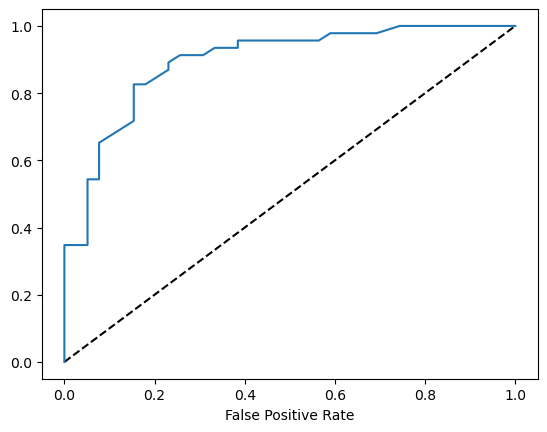

In [143]:
#predicting the probability of having 1 in the x-test
rf.fit(x_train, y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("False Positive Rate")

# Saving Model In Pickle

In [144]:
import pickle

In [145]:
filename="load application prediction.pkl"

In [146]:
pickle.dump(rf,open(filename,"wb"))

In [147]:
#conclusion
loaded_model=pickle.load(open("load application prediction.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result*100)

82.35294117647058


In [148]:
#conclusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Origional"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Predicted,1,0,1,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
Origional,1,0,1,0,0,1,0,1,1,1,...,0,0,1,1,0,1,0,0,1,0
